In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
dataset=pd.read_csv("preprocessedloan_data.csv")

In [3]:
dataset

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0,0


In [4]:
rows, columns = dataset.shape
rows, columns

(4269, 13)

# 1.Replace Nan values

In [5]:

dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 education_ Not Graduate     0
 self_employed_ Yes          0
 loan_status_ Rejected       0
dtype: int64

In [6]:
column_data_types = dataset.dtypes

In [7]:
column_data_types

loan_id                      int64
 no_of_dependents            int64
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
 education_ Not Graduate     int64
 self_employed_ Yes          int64
 loan_status_ Rejected       int64
dtype: object

In [8]:
dataset.columns

Index(['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value',
       ' education_ Not Graduate', ' self_employed_ Yes',
       ' loan_status_ Rejected'],
      dtype='object')

In [9]:
unique_values = dataset.apply(pd.unique)

print(unique_values)

loan_id                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
 no_of_dependents                                           [2, 0, 3, 5, 4, 1]
 income_annum                [9600000, 4100000, 9100000, 8200000, 9800000, ...
 loan_amount                 [29900000, 12200000, 29700000, 30700000, 24200...
 loan_term                                [12, 8, 20, 10, 4, 2, 18, 16, 14, 6]
 cibil_score                 [778, 417, 506, 467, 382, 319, 678, 782, 388, ...
 residential_assets_value    [2400000, 2700000, 7100000, 18200000, 12400000...
 commercial_assets_value     [17600000, 2200000, 4500000, 3300000, 8200000,...
 luxury_assets_value         [22700000, 8800000, 33300000, 23300000, 294000...
 bank_asset_value            [8000000, 3300000, 12800000, 7900000, 5000000,...
 education_ Not Graduate                                                [0, 1]
 self_employed_ Yes                                                     [0, 1]
 loan_status_ Rejected                              

In [10]:
dataset[' loan_status_ Rejected'].astype(str)

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name:  loan_status_ Rejected, Length: 4269, dtype: object

# 2.How many loans are approved from overall data

In [11]:
# Strip leading/trailing whitespace from column names
dataset.columns = dataset.columns.str.strip()

# Print the column names to verify the correct name
print("Column names after stripping:", dataset.columns)

# Check for the correct column name and print it
correct_column_name = [col for col in dataset.columns if 'loan_status' in col]
print("Correct column name identified:", correct_column_name)

# Ensure the column is numeric and handle missing values
if correct_column_name:
    dataset[correct_column_name[0]] = pd.to_numeric(dataset[correct_column_name[0]], errors='coerce')

    # Count the occurrences of 'Approved' (assuming 0 represents approved)
    approved_count = (dataset[correct_column_name[0]] == 0).sum()

    # Display the result
    print("Number of approved loans:", approved_count)
else:
    print("Column 'loan_status_Rejected' not found after stripping.")

Column names after stripping: Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Not Graduate', 'self_employed_ Yes',
       'loan_status_ Rejected'],
      dtype='object')
Correct column name identified: ['loan_status_ Rejected']
Number of approved loans: 2656


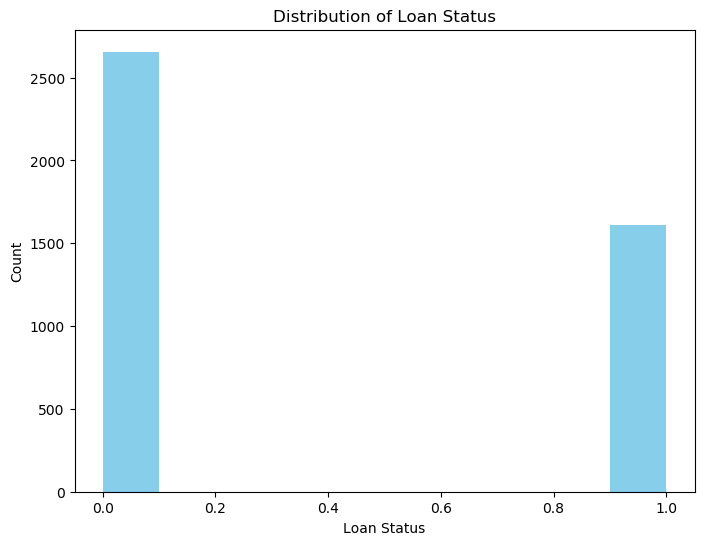

In [12]:
import matplotlib.pyplot as plt
# Ensure the column is numeric and handle missing values
if correct_column_name:
    dataset[correct_column_name[0]] = pd.to_numeric(dataset[correct_column_name[0]], errors='coerce')

    # Create a histogram to visualize the distribution of loan statuses
    plt.figure(figsize=(8, 6))
    dataset[correct_column_name[0]].plot(kind='hist', bins=10, color='skyblue')  # Assuming 10 bins
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.title('Distribution of Loan Status')
    plt.show()
else:
    print("Column 'loan_status' not found after stripping.")

# 3.What is the overall loan approval rate in the dataset?

In [13]:
dataset['loan_status_ Rejected'].value_counts(normalize=True)

0    0.62216
1    0.37784
Name: loan_status_ Rejected, dtype: float64

# 4.What is the distribution of loan amounts requested?

In [14]:
# Loan Amount Distribution
dataset['loan_amount'].describe()

count    4.269000e+03
mean     1.513345e+07
std      9.043363e+06
min      3.000000e+05
25%      7.700000e+06
50%      1.450000e+07
75%      2.150000e+07
max      3.950000e+07
Name: loan_amount, dtype: float64

# 5.What is the distribution of loan terms requested?

In [15]:
# Loan Term Distribution
print("\nLoan Term Distribution:")
dataset['loan_term'].value_counts()


Loan Term Distribution:


6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: loan_term, dtype: int64

# 6..What is the distribution of CIBIL (credit) scores in the dataset?

In [16]:
# Credit Score Distribution
print("\nCredit Score Distribution:")
dataset['cibil_score'].describe()


Credit Score Distribution:


count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64

# 7.What is the distribution of different asset values (residential, commercial, luxury, and bank assets)?

In [17]:
# Asset Value Distribution
print("\nAsset Value Distribution:")
for asset in ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']:
    print(f"{asset}:")
    print(dataset[asset].describe())


Asset Value Distribution:
residential_assets_value:
count    4.269000e+03
mean     7.472617e+06
std      6.503637e+06
min     -1.000000e+05
25%      2.200000e+06
50%      5.600000e+06
75%      1.130000e+07
max      2.910000e+07
Name: residential_assets_value, dtype: float64
commercial_assets_value:
count    4.269000e+03
mean     4.973155e+06
std      4.388966e+06
min      0.000000e+00
25%      1.300000e+06
50%      3.700000e+06
75%      7.600000e+06
max      1.940000e+07
Name: commercial_assets_value, dtype: float64
luxury_assets_value:
count    4.269000e+03
mean     1.512631e+07
std      9.103754e+06
min      3.000000e+05
25%      7.500000e+06
50%      1.460000e+07
75%      2.170000e+07
max      3.920000e+07
Name: luxury_assets_value, dtype: float64
bank_asset_value:
count    4.269000e+03
mean     4.976692e+06
std      3.250185e+06
min      0.000000e+00
25%      2.300000e+06
50%      4.600000e+06
75%      7.100000e+06
max      1.470000e+07
Name: bank_asset_value, dtype: float64


# 8.How does the number of dependents impact loan approval/rejection?

In [18]:
# Dependents Analysis
print("\nDependents Analysis:")
print(dataset.groupby('no_of_dependents')['loan_status_ Rejected'].value_counts(normalize=True))


Dependents Analysis:
no_of_dependents  loan_status_ Rejected
0                 0                        0.641854
                  1                        0.358146
1                 0                        0.616930
                  1                        0.383070
2                 0                        0.622881
                  1                        0.377119
3                 0                        0.628611
                  1                        0.371389
4                 0                        0.618351
                  1                        0.381649
5                 0                        0.603269
                  1                        0.396731
Name: loan_status_ Rejected, dtype: float64


# 9.How does the education level (Graduate or Not Graduate) influence loan approval/rejection?

In [19]:
# Education Level Analysis
print("\nEducation Level Analysis:")
dataset.groupby('education_ Not Graduate')['loan_status_ Rejected'].value_counts(normalize=True)


Education Level Analysis:


education_ Not Graduate  loan_status_ Rejected
0                        0                        0.624534
                         1                        0.375466
1                        0                        0.619765
                         1                        0.380235
Name: loan_status_ Rejected, dtype: float64

# 10.How does the self-employment status (Yes or No) affect loan approval/rejection?

In [20]:
# Self-Employment Status Analysis
print("\nSelf-Employment Status Analysis:")
dataset.groupby('self_employed_ Yes')['loan_status_ Rejected'].value_counts(normalize=True)


Self-Employment Status Analysis:


self_employed_ Yes  loan_status_ Rejected
0                   0                        0.621992
                    1                        0.378008
1                   0                        0.622326
                    1                        0.377674
Name: loan_status_ Rejected, dtype: float64

# 11.What is the distribution of annual income in the dataset?

In [21]:
# Income Analysis
print("\nIncome Analysis:")
print(dataset['income_annum'].describe())


Income Analysis:
count    4.269000e+03
mean     5.059124e+06
std      2.806840e+06
min      2.000000e+05
25%      2.700000e+06
50%      5.100000e+06
75%      7.500000e+06
max      9.900000e+06
Name: income_annum, dtype: float64


In [22]:
# Dependents Analysis
print("\nDependents Analysis:")
print(dataset.groupby('no_of_dependents')['loan_status_ Rejected'].value_counts(normalize=True))


Dependents Analysis:
no_of_dependents  loan_status_ Rejected
0                 0                        0.641854
                  1                        0.358146
1                 0                        0.616930
                  1                        0.383070
2                 0                        0.622881
                  1                        0.377119
3                 0                        0.628611
                  1                        0.371389
4                 0                        0.618351
                  1                        0.381649
5                 0                        0.603269
                  1                        0.396731
Name: loan_status_ Rejected, dtype: float64


# 12 .How many people were slef employed and NOt selfemployed

In [23]:
# Check data type and strip whitespace
dataset['self_employed_ Yes'] = dataset['self_employed_ Yes'].astype(str).str.strip()

# Count the occurrences of self-employed individuals (self_employed_Yes = '1') and not self-employed (self_employed_Yes = '0')
selfemployed_count = (dataset['self_employed_ Yes'] == '1').sum()
non_selfemployed_count = (dataset['self_employed_ Yes'] == '0').sum()

# Display the results
print("Number of self-employed individuals:", selfemployed_count)
print("Number of non self-employed individuals:", non_selfemployed_count)


Number of self-employed individuals: 2150
Number of non self-employed individuals: 2119


In [24]:
selfemployed_count

2150

In [25]:
non_selfemployed_count 

2119

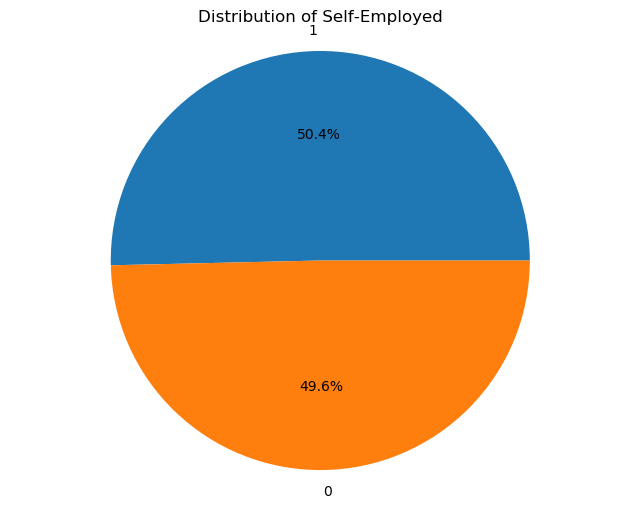

In [26]:

# Convert 'loan_status' column to string
dataset['self_employed_ Yes'] = dataset['self_employed_ Yes'].astype(str)

# Remove leading/trailing whitespace
dataset['self_employed_ Yes'] = dataset['self_employed_ Yes'].str.strip()

values = dataset['self_employed_ Yes'].value_counts().values
labels = dataset['self_employed_ Yes'].value_counts().index

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.title('Distribution of Self-Employed')
plt.show()

# 13.What is the distribution of CIBIL scores across approved and rejected loans?

C:\anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  if sys.path[0] == "":
C:\anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  from ipykernel import kernelapp as app


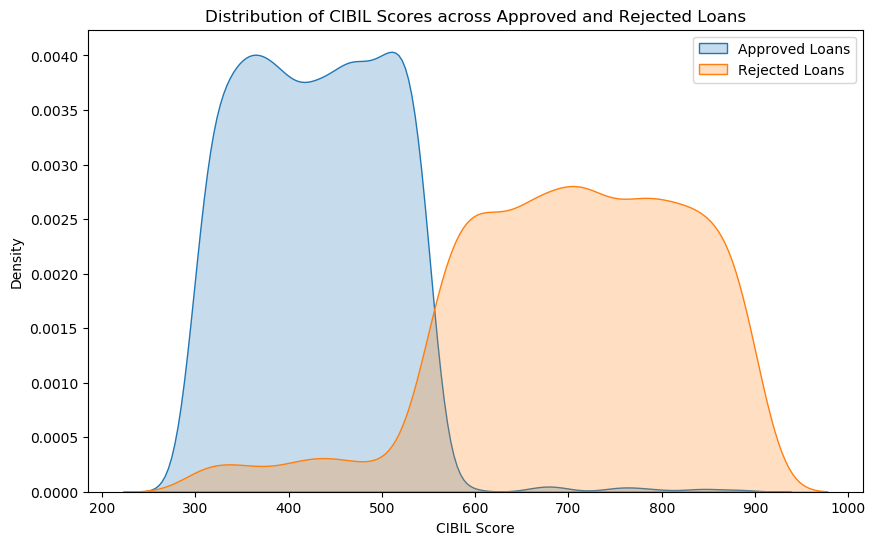

In [27]:
# Convert 'loan_status' column to string if it's not already binary
dataset['loan_status_ Rejected'] = dataset['loan_status_ Rejected'].astype(int)

# Filter approved and rejected loans
approved_loans = dataset[dataset['loan_status_ Rejected'] == 1]['cibil_score']
rejected_loans = dataset[dataset['loan_status_ Rejected'] == 0]['cibil_score']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the KDE plot for approved loans
sns.kdeplot(approved_loans, shade=True, label='Approved Loans', ax=ax)

# Plot the KDE plot for rejected loans
sns.kdeplot(rejected_loans, shade=True, label='Rejected Loans', ax=ax)

# Set plot title and labels
ax.set_title('Distribution of CIBIL Scores across Approved and Rejected Loans')
ax.set_xlabel('CIBIL Score')
ax.set_ylabel('Density')

# Add legend
ax.legend()

# Show the plot
plt.show()

# 13.How does the income_annum distribution differ between graduates and non-graduates?

In [31]:
# Convert 'education_ Not Graduate' to string and create 'education' column
dataset['education_ Not Graduate'] = dataset['education_ Not Graduate'].astype(str)
dataset['education'] = dataset['education_ Not Graduate'].apply(lambda x: 'Not Graduate' if x == '1' else 'Graduate')

# Count the occurrences of 'Graduate' and 'Not Graduate'
Graduate_count = (dataset['education'] == 'Graduate').sum()
Not_Graduate_count = (dataset['education'] == 'Not Graduate').sum()

print(f"Number of Graduates: {Graduate_count}")
print(f"Number of Non-Graduates: {Not_Graduate_count}")



Number of Graduates: 2144
Number of Non-Graduates: 2125


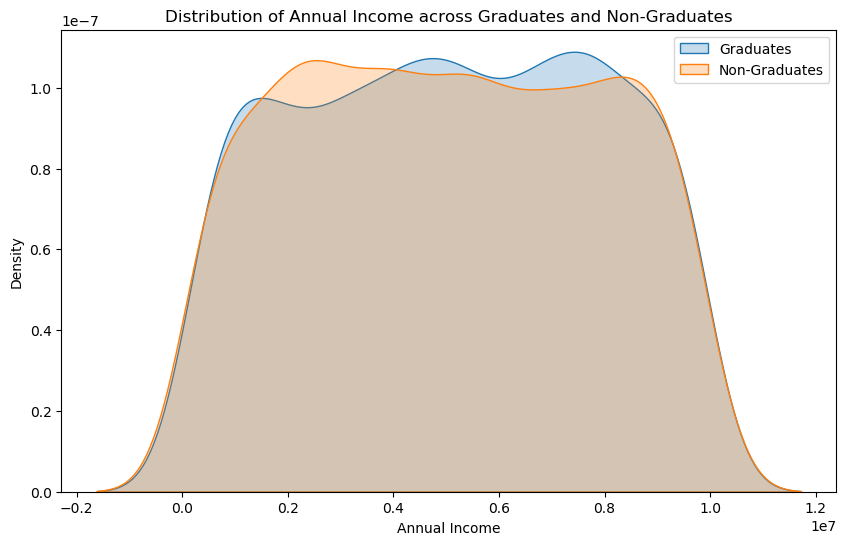

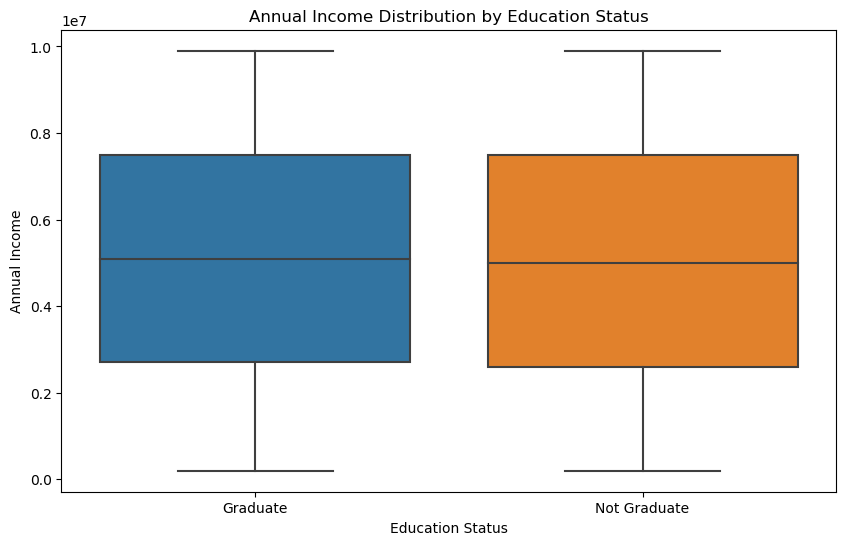

In [32]:
# Filter the income_annum data based on education status
graduate_income = dataset[dataset['education'] == 'Graduate']['income_annum']
non_graduate_income = dataset[dataset['education'] == 'Not Graduate']['income_annum']

# Create a figure and axis for the KDE plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the KDE plot for graduates
sns.kdeplot(graduate_income, fill=True, label='Graduates', ax=ax)

# Plot the KDE plot for non-graduates
sns.kdeplot(non_graduate_income, fill=True, label='Non-Graduates', ax=ax)

# Set plot title and labels
ax.set_title('Distribution of Annual Income across Graduates and Non-Graduates')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Density')

# Add legend
ax.legend()

# Show the plot
plt.show()

# Alternatively, you can use box plots for a different perspective
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='education', y='income_annum', data=dataset, ax=ax)
ax.set_title('Annual Income Distribution by Education Status')
ax.set_xlabel('Education Status')
ax.set_ylabel('Annual Income')
plt.show()

# 14.Is there a correlation between loan_amount and income_annum?

The correlation between loan amount and income per annum is: 0.9274699109871487


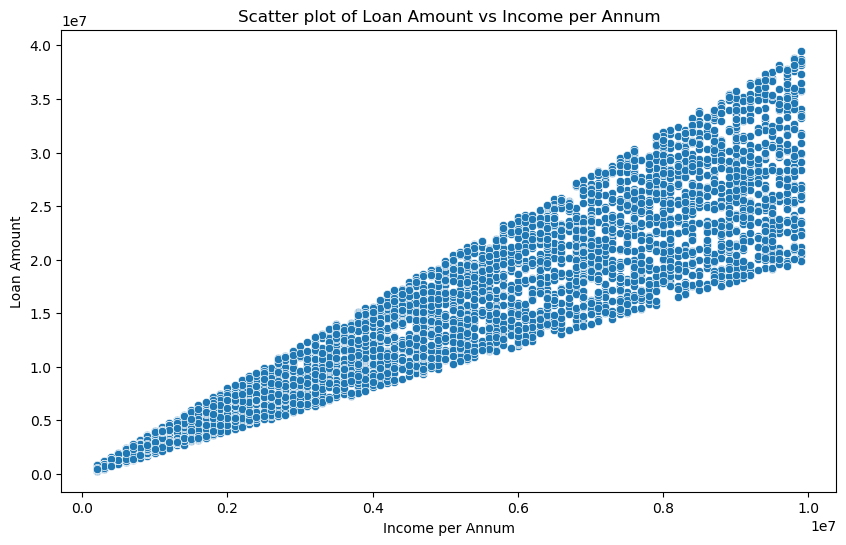

In [35]:
# Creating DataFrame
df = pd.DataFrame(dataset)

# Calculating the correlation
correlation = df['loan_amount'].corr(df['income_annum'])
print(f"The correlation between loan amount and income per annum is: {correlation}")

# Visualizing the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income_annum', y='loan_amount', data=df)
plt.title('Scatter plot of Loan Amount vs Income per Annum')
plt.xlabel('Income per Annum')
plt.ylabel('Loan Amount')
plt.show()

# 15.Compare the average loan_term between approved and rejected loans

In [39]:
df = pd.DataFrame(dataset)

# Creating a column to indicate loan status as 'Approved' or 'Rejected'
df['loan_status'] = df['loan_status_ Rejected'].apply(lambda x: 'Rejected' if x == 1 else 'Approved')

# Calculating the average loan term for each loan status
average_loan_term = df.groupby('loan_status')['loan_term'].mean()

print("Average loan term for each loan status:")
print(average_loan_term)

Average loan term for each loan status:
loan_status
Approved    10.397590
Rejected    11.728456
Name: loan_term, dtype: float64


# 17.What is the average value of loan_amount?


In [41]:
dataset['loan_amount'].mean()

15133450.456781447

# 18.What is the most frequently repeated value of loan_amount?

In [42]:
dataset['loan_amount'].mode()[0]

10600000

# 19.what kind of relationship between cibil_score and loan_amount

In [43]:
dataset.corr()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_ Rejected
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,-0.017685
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.015465
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000,0.006778


# 20.How many people get loan  approved with no. of dependents morethan 2 

In [45]:
filtered_data = dataset[(dataset['no_of_dependents'] > 2) & (dataset['loan_status'] == 'Approved')]

In [46]:
filtered_data 

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected,education,loan_status
6,7,5,8700000,33000000,4,678,22500000,14800000,29200000,4300000,0,0,0,Graduate,Approved
10,11,4,2900000,11200000,2,547,8100000,4700000,9500000,3100000,0,1,0,Graduate,Approved
15,16,5,4700000,10700000,10,794,5700000,3900000,16400000,4400000,1,0,0,Not Graduate,Approved
17,18,4,2900000,9400000,14,780,2900000,2800000,6700000,4300000,1,1,0,Not Graduate,Approved
19,20,5,6300000,14600000,12,652,10300000,3500000,23500000,5900000,0,0,0,Graduate,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,4250,4,1100000,4000000,14,887,2400000,1500000,4200000,1600000,0,0,0,Graduate,Approved
4253,4254,5,7000000,26200000,12,896,13100000,6600000,23600000,5700000,0,1,0,Graduate,Approved
4260,4261,5,8800000,29300000,10,560,16800000,13900000,31100000,9900000,0,0,0,Graduate,Approved
4261,4262,3,3000000,7500000,6,881,1400000,4500000,6100000,2300000,0,1,0,Graduate,Approved


In [47]:
count_filtered_data = filtered_data.shape[0]

In [48]:
count_filtered_data

1328